<a href="https://colab.research.google.com/github/SarahMohareb/Data-Science-Methodology-Project/blob/main/Final_project_methodology_MSHH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from the specified file path with proper encoding for␣special characters
data = pd.read_csv('/content/crime_dataset_india.csv')
# Convert the loaded data into a DataFrame for easier manipulation
df = pd.DataFrame(data)
# Display the first few rows of the DataFrame to check the structure of the data
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [ ]:
# Display the dimensions (rows, columns) of the DataFrame
df.shape

(40160, 14)

In [ ]:
# Display information about the DataFrame, such as column types and non-null␣values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [ ]:
# Provide a statistical summary of numerical columns
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


In [ ]:
# Check if there are any duplicate rows in the DataFrame
df.duplicated().any()

False

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64


In [ ]:
# Handling missing values
df['Weapon Used'].fillna('Unknown', inplace=True)

# Check the remaining missing values
print("\nMissing values after handling 'Weapon Used':\n", df['Weapon Used'].isnull().sum())

df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')
df = df.dropna(subset=['Date Case Closed'])


# Recheck missing values
print("\nMissing values after handling 'Date Case Closed':\n", df['Date Case Closed'].isnull().sum())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values after handling 'Weapon Used':
 0


<ipython-input-48-a89b1ab54e21>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weapon Used'].fillna('Unknown', inplace=True)
<ipython-input-48-a89b1ab54e21>:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], errors='coerce')



Missing values after handling 'Date Case Closed':
 20098

Missing values in each column:
 Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used               0
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64


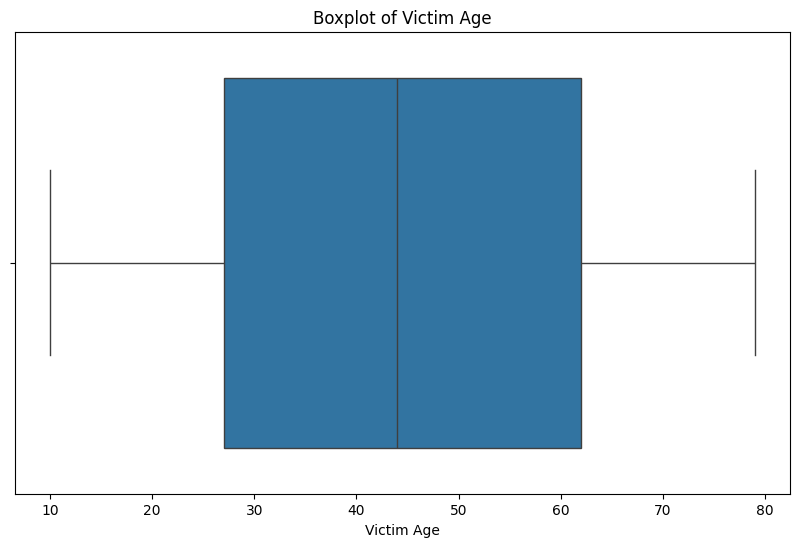

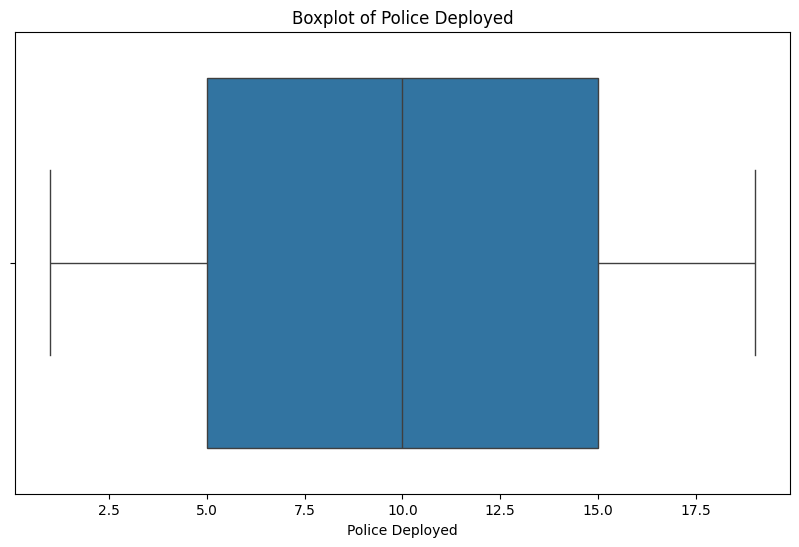

In [ ]:
# Visualize the distribution of 'Victim Age' and 'Police Deployed' using boxplots to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Victim Age'])
plt.title('Boxplot of Victim Age')
plt.show()

# Removing outliers in 'Victim Age' based on IQR
Q1 = df['Victim Age'].quantile(0.25)
Q3 = df['Victim Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Victim Age'] >= lower_bound) & (df['Victim Age'] <= upper_bound)]

# Visualize 'Police Deployed' for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Police Deployed'])
plt.title('Boxplot of Police Deployed')
plt.show()

# Removing outliers in 'Police Deployed' based on IQR
Q1 = df['Police Deployed'].quantile(0.25)
Q3 = df['Police Deployed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Police Deployed'] >= lower_bound) & (df['Police Deployed'] <= upper_bound)]

In [ ]:
# Convert to datetime
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce')
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], format='%H:%M:%S', errors='coerce').dt.time
# Check the data types of the columns to address inconsistencies
print(df.dtypes)

Report Number                  int64
Date Reported                 object
Date of Occurrence    datetime64[ns]
Time of Occurrence    datetime64[ns]
City                          object
Crime Code                     int64
Crime Description             object
Victim Age                     int64
Victim Gender                 object
Weapon Used                   object
Crime Domain                  object
Police Deployed                int64
Case Closed                   object
Date Case Closed      datetime64[ns]
dtype: object


In [ ]:
# Print the number of unique values in each column of the DataFrame
print(df.nunique())

Report Number         40160
Date Reported         25546
Date of Occurrence    40160
Time of Occurrence        0
City                     29
Crime Code              500
Crime Description        21
Victim Age               70
Victim Gender             3
Weapon Used               7
Crime Domain              4
Police Deployed          19
Case Closed               2
Date Case Closed      16011
dtype: int64


In [ ]:
# Create a new DataFrame by selecting only the 'City' and 'Crime Code'␣columns, dropping duplicate entries
filtered_data = df[["City","Crime Code"]].drop_duplicates()
print(filtered_data.head())
filtered_data.shape

        City  Crime Code
0  Ahmedabad         576
1    Chennai         128
2   Ludhiana         271
3       Pune         170
4       Pune         421


(11356, 2)

<Axes: xlabel='City'>

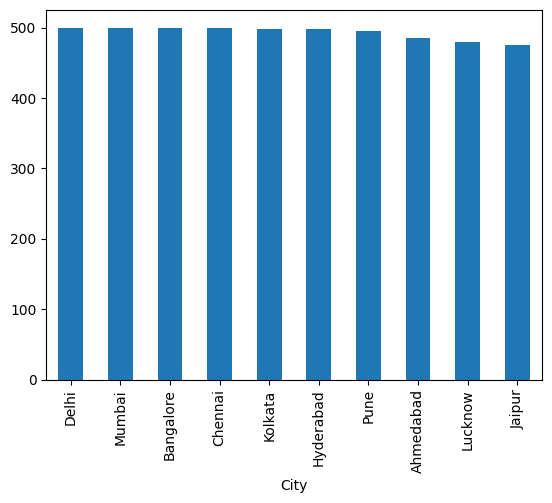

In [ ]:
# Top ten city's crime codes
filtered_data.City.value_counts()[:10].plot(kind='bar')

In [ ]:
# Filter the dataset to include only crimes made in Delhi
crime_data = df[df["City"] == "Delhi"]
crime_data.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
5,6,02-01-2020 03:00,2020-01-01 05:00:00,NaT,Delhi,442,ASSAULT,16,M,Firearm,Violent Crime,18,Yes,2020-03-30 03:00:00
10,11,02-01-2020 13:00,2020-01-01 10:00:00,NaT,Delhi,260,FRAUD,71,M,Explosives,Other Crime,5,Yes,2020-02-01 13:00:00
32,33,03-01-2020 04:00,2020-01-02 08:00:00,NaT,Delhi,319,ILLEGAL POSSESSION,73,F,Knife,Other Crime,19,No,NaT
42,43,03-01-2020 03:00,2020-01-02 18:00:00,NaT,Delhi,172,FIREARM OFFENSE,40,M,Poison,Fire Accident,10,Yes,2020-03-17 03:00:00
46,47,05-01-2020 04:00,2020-01-02 22:00:00,NaT,Delhi,555,ROBBERY,47,F,Unknown,Violent Crime,9,No,NaT


In [ ]:
print(crime_data.nunique())

Report Number         5400
Date Reported         5053
Date of Occurrence    5400
Time of Occurrence       0
City                     1
Crime Code             500
Crime Description       21
Victim Age              70
Victim Gender            3
Weapon Used              7
Crime Domain             4
Police Deployed         19
Case Closed              2
Date Case Closed      2577
dtype: int64


In [ ]:
# Statistical overview of numerical columns
numerical_stats = crime_data[['Victim Age', 'Police Deployed']].describe()
print("\nStatistical overview of numerical columns:\n", numerical_stats)


Statistical overview of numerical columns:
         Victim Age  Police Deployed
count  5400.000000      5400.000000
mean     44.225370         9.947963
std      20.124086         5.486085
min      10.000000         1.000000
25%      27.000000         5.000000
50%      44.000000        10.000000
75%      61.000000        15.000000
max      79.000000        19.000000


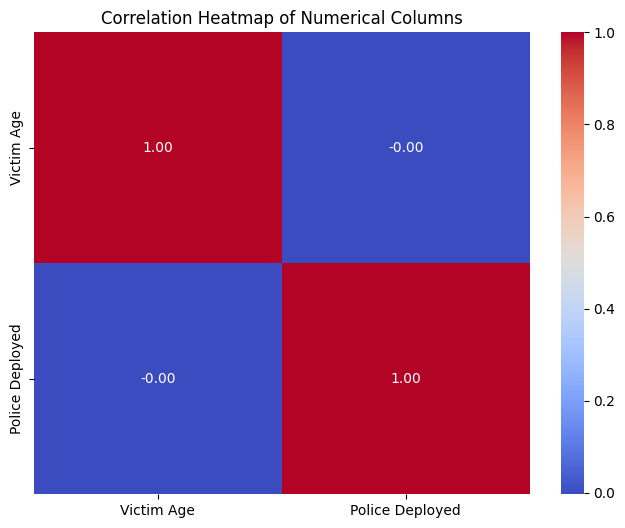

In [ ]:
# Visulization
# use Heatmap to identify correlations between numerical columns
plt.figure(figsize=(8, 6))
corr = crime_data[['Victim Age', 'Police Deployed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

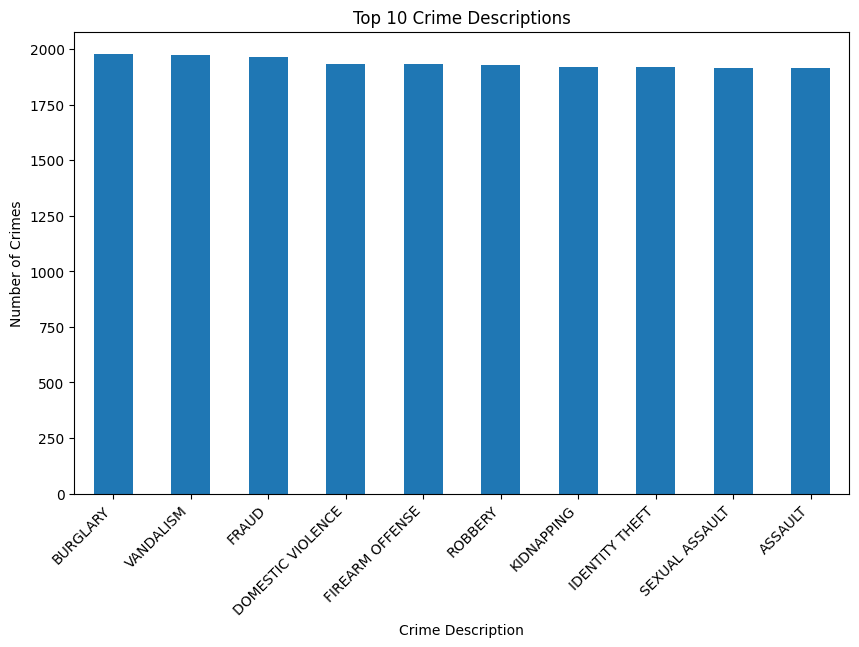

In [ ]:
crime_counts = df['Crime Description'].value_counts().head(10)

# use bar Plot to view top 10 crime description
crime_counts.plot(kind='bar', figsize=(10, 6), title='Top 10 Crime Descriptions', ylabel='Number of Crimes', xlabel='Crime Description')
plt.xticks(rotation=45, ha='right')
plt.show()

# burglary is the top crime description


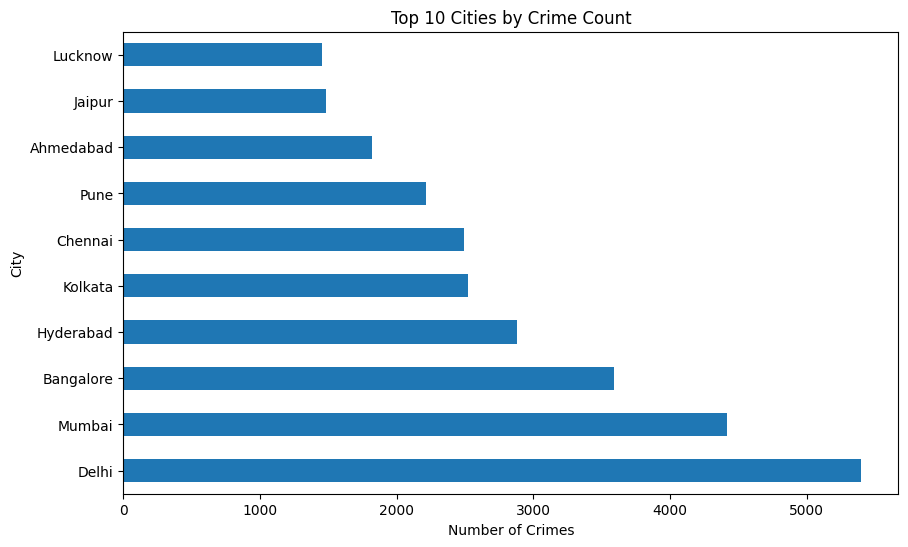

In [ ]:
# Horizontal Bar Chart: Display the cities with the highest number of crimes.


city_counts = df['City'].value_counts().head(10)

# Plot
city_counts.plot(kind='barh', figsize=(10, 6), title='Top 10 Cities by Crime Count', xlabel='Number of Crimes', ylabel='City')
plt.show()


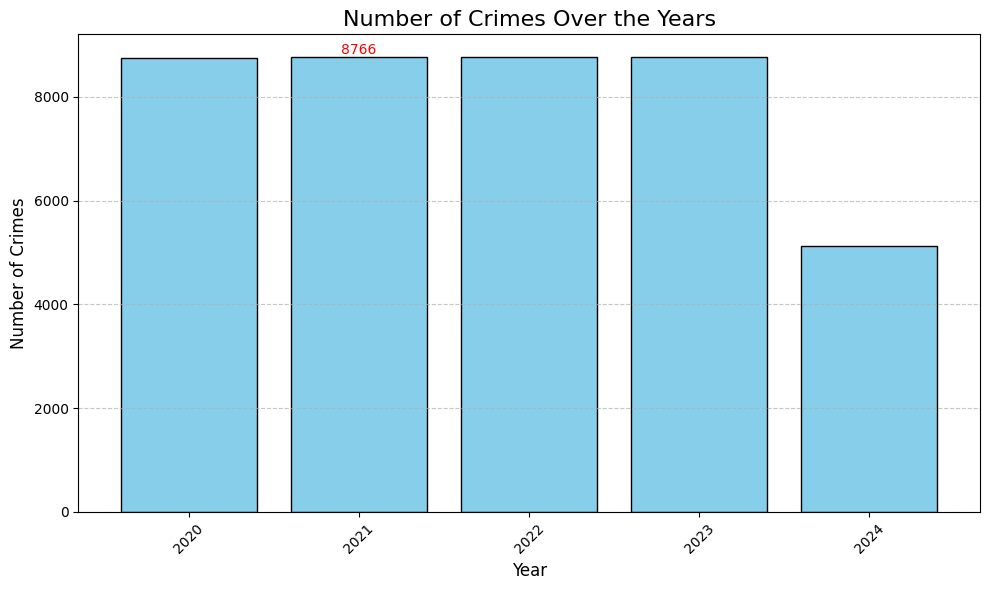

The year with the most crimes is 2021 with 8766 crimes.


In [ ]:
#a bar chart is used to display the count of crimes reported for each year and the peak year for crimes

# Ensure the 'Date Reported' column is in datetime format
df['Date Reported'] = pd.to_datetime(df['Date Reported'], dayfirst=True)

# Extract the year from 'Date Reported'
df['Year Reported'] = df['Date Reported'].dt.year

# Count the number of crimes per year
crimes_by_year = df['Year Reported'].value_counts().sort_index()

# Fix potential scaling issues by limiting the figure size
plt.figure(figsize=(10, 6))
crimes_by_year.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)
plt.title('Number of Crimes Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the year with the most crimes
max_year = crimes_by_year.idxmax()
max_crimes = crimes_by_year.max()
plt.text(crimes_by_year.index.get_loc(max_year), max_crimes, f'{max_crimes}',
         ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print the year with the most crimes
print(f"The year with the most crimes is {max_year} with {max_crimes} crimes.")


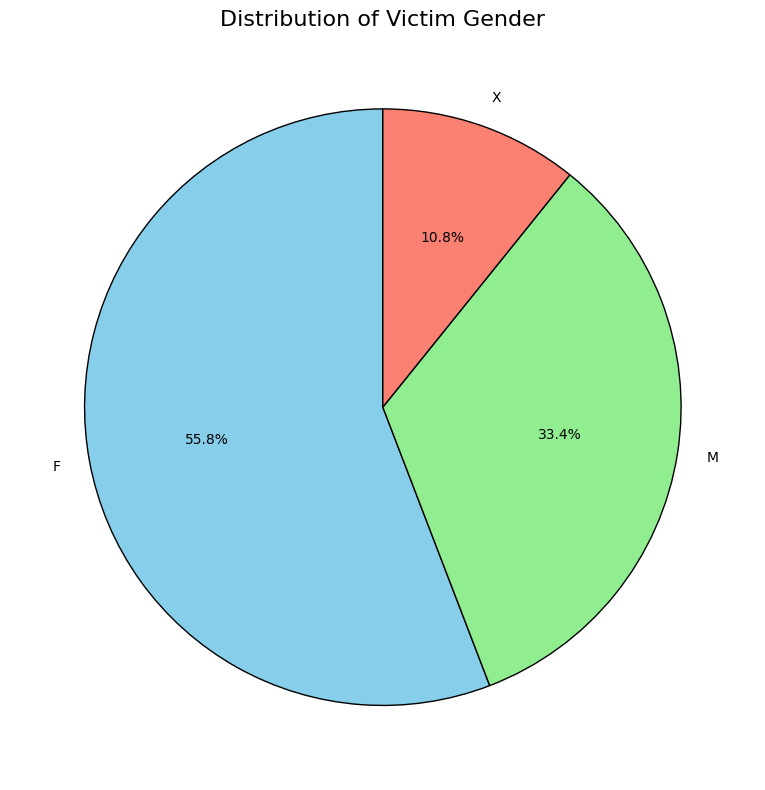

In [ ]:
#use pie chart to visualize how specific parts relate to the whole
# Count the occurrences of each gender
gender_counts = df['Victim Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'],
                   labels=gender_counts.index, wedgeprops={'edgecolor': 'black'})

# Customize the plot
plt.title('Distribution of Victim Gender', fontsize=16)
plt.ylabel('')  # Removes the default y-axis label
plt.tight_layout()
plt.show()

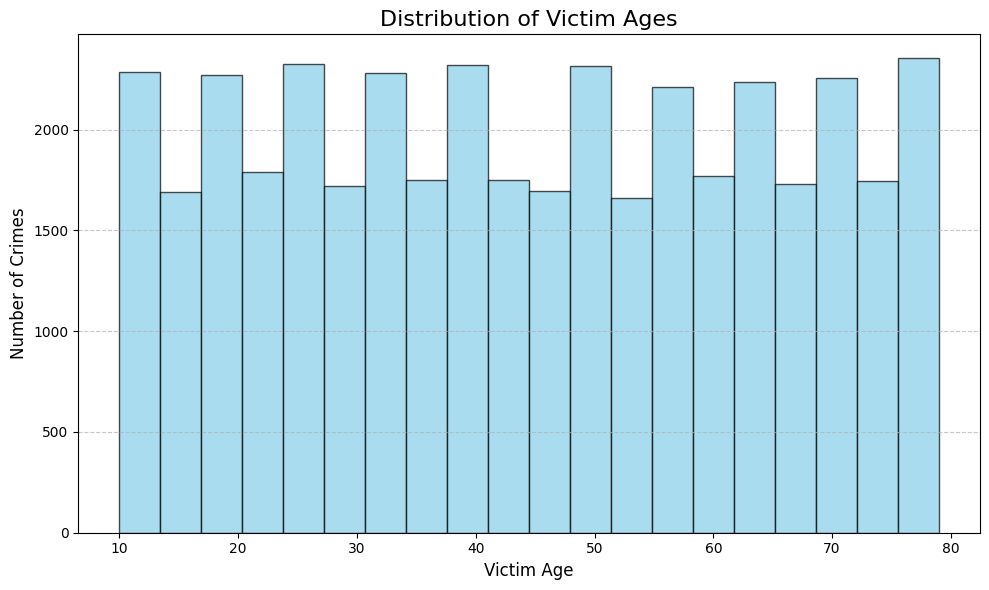

In [ ]:
#use histogram to show frequency of data points within each interval.

# Plot a histogram for Victim Age
plt.figure(figsize=(10, 6))
plt.hist(df['Victim Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Victim Ages', fontsize=16)
plt.xlabel('Victim Age', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


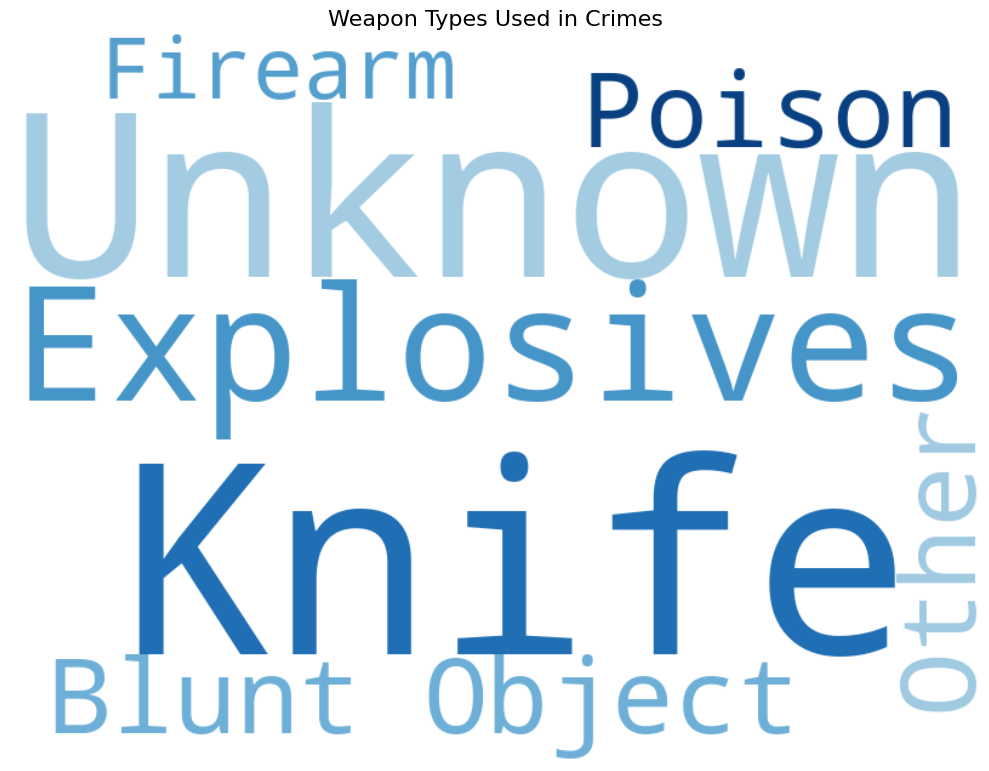

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count the occurrences of each weapon type
weapon_counts = df['Weapon Used'].value_counts()

# Convert the weapon counts to a dictionary (necessary format for WordCloud)
weapon_dict = weapon_counts.to_dict()

# Generate the word cloud
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=600, background_color='white', colormap='Blues').generate_from_frequencies(weapon_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Weapon Types Used in Crimes', fontsize=16)
plt.axis('off')  # Hide axes
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
crime_data = df[["Date Reported", "Date of Occurrence", "Date Case Closed", "Crime Code", "Victim Age", "Police Deployed"]]

# Convert date columns to datetime format
date_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in date_columns:
    crime_data[col] = pd.to_datetime(crime_data[col], errors='coerce')

crime_data.head()

<ipython-input-64-6d97f2f9efa4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[col] = pd.to_datetime(crime_data[col], errors='coerce')
<ipython-input-64-6d97f2f9efa4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data[col] = pd.to_datetime(crime_data[col], errors='coerce')
<ipython-input-64-6d97f2f9efa4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Date Reported,Date of Occurrence,Date Case Closed,Crime Code,Victim Age,Police Deployed
0,2020-01-02 00:00:00,2020-01-01 00:00:00,NaT,576,16,13
1,2020-01-01 19:00:00,2020-01-01 01:00:00,NaT,128,37,9
2,2020-01-02 05:00:00,2020-01-01 02:00:00,NaT,271,48,15
3,2020-01-01 05:00:00,2020-01-01 03:00:00,2020-04-29 05:00:00,170,49,1
4,2020-01-01 21:00:00,2020-01-01 04:00:00,2020-01-08 21:00:00,421,30,18


In [ ]:
#Getting the time at the moment
present_time = datetime.now()
present_time

datetime.datetime(2024, 12, 14, 15, 14, 18, 308637)

In [ ]:
# RFM Analysis
#get the current date and time to calculate the recency of crimes
present_time = pd.Timestamp.now()
#summarize and combine data by aggregation
#Recency for each crime code.
#Frequency of each crime code
#Monetary value for each crime code
rfm = crime_data.groupby("Crime Code").agg({
    "Date Reported": lambda date: (present_time - date.max()).days,
    "Crime Code": 'count',
    "Police Deployed": 'sum'
})
rfm.head()

,Date Reported,Crime Code,Police Deployed
Crime Code,,,
100,158,72,715
101,136,78,821
102,137,89,967
103,250,75,758
104,210,85,791


In [ ]:
#Re-naming the columns of the rfm dataframe
rfm.rename(columns={
    'Date Reported': 'Recency',
    'Crime Code': 'Frequency',
    'Police Deployed': 'Monetary'
}, inplace=True)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 100 to 599
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    500 non-null    int64
 1   Frequency  500 non-null    int64
 2   Monetary   500 non-null    int64
dtypes: int64(3)
memory usage: 15.6 KB


In [ ]:
# Create quartiles for Recency, assigning lower values to more recent most recent
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
# Create quartiles for Frequency, assigning higher values to most frequent
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
# Create quartiles for Monetary, assigning higher values to highest spending
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
Crime Code,,,,,,
100,158,72,715,3,4,4
101,136,78,821,1,3,2
102,137,89,967,1,1,1
103,250,75,758,4,3,3
104,210,85,791,4,2,3


In [ ]:
# Combine the quartile rankings into a single RFM score (Recency, Frequency,Monetary)
rfm["RFM_Score"] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
Crime Code,,,,,,,
100,158,72,715,3,4,4,344
101,136,78,821,1,3,2,132
102,137,89,967,1,1,1,111
103,250,75,758,4,3,3,433
104,210,85,791,4,2,3,423


In [ ]:
# Filter who have the best RFM score (111) and display
rfm[rfm['RFM_Score']=='111'].sort_values('Monetary',ascending=False).head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
Crime Code,,,,,,,
372,139,108,1128,1,1,1,111
157,136,101,1093,1,1,1,111
311,134,100,1023,1,1,1,111
341,137,108,1017,1,1,1,111
321,140,91,1008,1,1,1,111


In [ ]:
# Create RFM segments based on the RFM score
rfm["RFM_Score"] = rfm['RFM_Score'].astype(int)
segment_labels = ['High-Value', 'Mid-Value','Low-Value']
rfm['Value_Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)
rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,Value_Segment
Crime Code,,,,,,,,
100,158,72,715,3,4,4,344,Low-Value
101,136,78,821,1,3,2,132,High-Value
102,137,89,967,1,1,1,111,High-Value
103,250,75,758,4,3,3,433,Low-Value
104,210,85,791,4,2,3,423,Low-Value


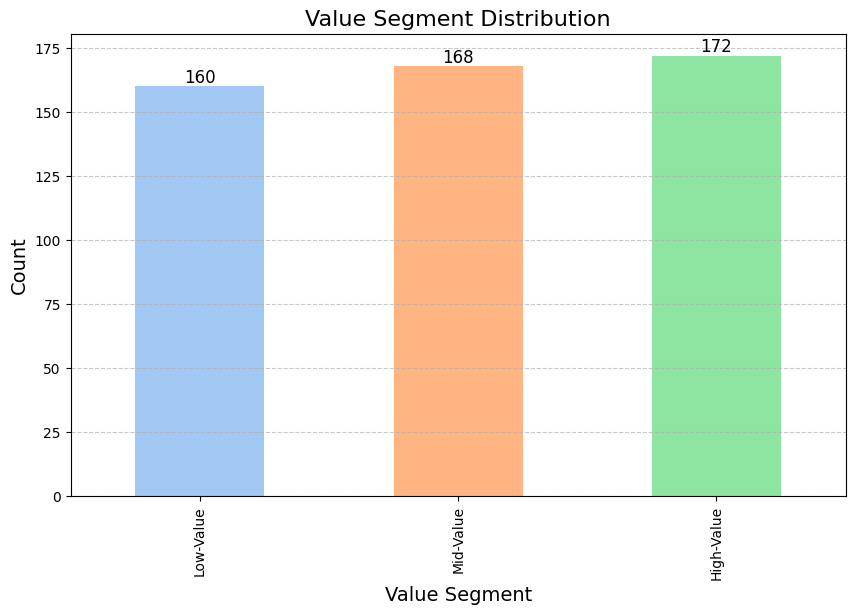

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6)) # Set the figure size
ax = rfm.Value_Segment.value_counts().sort_values().plot(kind='bar', color=sns.color_palette("pastel"))
# Customize the plot
ax.set_title('Value Segment Distribution', fontsize=16) # Add a title with font size
ax.set_xlabel('Value Segment', fontsize=14) # Add x-label with font size
ax.set_ylabel('Count', fontsize=14) # Add y-label with font size
ax.grid(axis='y', linestyle='--', alpha=0.7) # Add gridlines for better readability
# Show value annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()